#                                          Final Capstone Project

## Introduction

In the following project we will analyze the state of Nevada, in this state we will focus on Las Vegas for our first analysis approach, with that information we will be able to know where should we open a restaurant, we decided to evaluate the possibility of opening a restaurant in this state because of the wide range of tourists that come to visit Las Vegas, this place is one of the most visited locations by tourists and Americans, and there might be a possibility of opening with success a restaurant.

## Data Description

We will be analyzig the geographical data of Nevada from a dataset that has been downloaded from "https://www.kaggle.com/pavansanagapati/us-wages-via-zipcode?select=free-zipcode-database.csv", and we will only be considering the following variables:

- longitude
- latitude
- City
- Zipcode

After we have analyzed the state we will use the Foursquare API in order to find the most convenient venues throughout the state of Nevada so we can analyze where is the most strategic location to have success on the business.

## Methodology

The data will be analyzed with the tools that we learned in the past weeks about the unsupervised method of clustering with k-means an in that way we will be able to find the perfect location.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import requests
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


## Load our csv file named "nevada.csv"

In [2]:
df = pd.read_csv('nevada.csv')

In [3]:
df.head()

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes
0,41350,89001,STANDARD,ALAMO,NV,PRIMARY,37.27,-115.20,-0.33,-0.71,0.60,NaN,US,"Alamo, NV",NA-US-NV-ALAMO,False,397.0,769.0,14631642.0,NaN
1,41351,89001,STANDARD,RACHEL,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,-0.71,0.60,NaN,US,"Rachel, NV",NA-US-NV-RACHEL,False,397.0,769.0,14631642.0,NaN
2,41352,89001,STANDARD,TEMPIUTE,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,-0.71,0.60,NaN,US,"Tempiute, NV",NA-US-NV-TEMPIUTE,False,397.0,769.0,14631642.0,NaN
3,41353,89017,STANDARD,HIKO,NV,PRIMARY,37.72,-115.33,-0.33,-0.71,0.61,NaN,US,"Hiko, NV",NA-US-NV-HIKO,False,NaN,NaN,NaN,NaN
4,41354,89017,STANDARD,ALAMO,NV,NOT ACCEPTABLE,37.72,-115.33,-0.33,-0.71,0.61,NaN,US,"Alamo, NV",NA-US-NV-ALAMO,False,NaN,NaN,NaN,NaN


In [4]:
df1 = df[['LocationText','City','Zipcode','Lat','Long']]

In [5]:
df1.head()

,LocationText,City,Zipcode,Lat,Long
0,"Alamo, NV",ALAMO,89001,37.27,-115.20
1,"Rachel, NV",RACHEL,89001,37.27,-115.20
2,"Tempiute, NV",TEMPIUTE,89001,37.27,-115.20
3,"Hiko, NV",HIKO,89017,37.72,-115.33
4,"Alamo, NV",ALAMO,89017,37.72,-115.33


## Use Geolocator over Nevada

We will focus our location on Las Vegas

In [6]:
address = 'Las Vegas, NV'

geolocator = Nominatim(user_agent="lv_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Nevada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Nevada are 36.1672559, -115.1485163.


In [7]:
map_vegas = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, locationtext, city in zip(df1['Lat'], df1['Long'], df1['LocationText'], df1['City']):
    label = '{}, {}'.format(locationtext, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vegas)  
    
map_vegas

## Getting started with Foursquare API

In [8]:
CLIENT_ID = 'TCI01YDWBFAHCMEHDPEC5AFD2MVFQAJGUH0R33YXCAU1PI1V' # your Foursquare ID
CLIENT_SECRET = 'VYVODW55EZO1M5V1VTJYT32MZG3CBTGEML4ZQXSZIHHXBRZ3' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TCI01YDWBFAHCMEHDPEC5AFD2MVFQAJGUH0R33YXCAU1PI1V
CLIENT_SECRET:VYVODW55EZO1M5V1VTJYT32MZG3CBTGEML4ZQXSZIHHXBRZ3


In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

We will start loading the data that has been obtained from Foursquare and we will retrieve it and create a Dataframe so we can manage the data in an easy way.

In [10]:
LIMIT = 50
nevada_venues = getNearbyVenues(names=df['City'],
                                   latitudes=df['Lat'],
                                   longitudes=df['Long'],
                                   radius = 500
                                  )

ALAMO
RACHEL
TEMPIUTE
HIKO
ALAMO
ASH SPRINGS
CRYSTAL SPRINGS
AMARGOSA VALLEY
AMARGOSA VLY
LATHROP WELLS
AUSTIN
IONE
KINGSTON
REESE RIVER
BAKER
LEHMAN CAVES
BATTLE MOUNTAIN
BATTLE MTN
RIXIE
BEATTY
RHYOLITE
BLUE DIAMOND
OLD NEVADA
BOULDER CITY
WILLOW BEACH
BOULDER CITY
BUNKERVILLE
RIVERSIDE
CALIENTE
CARP
ELGIN
CRESCENT VALLEY
BEOWAWE
CRESCENT VLY
EMIGRANT PASS
CARLIN
DUNPHY
CARLIN
CARSON CITY
CARSON CITY MALL
CARSON COLONY
CARSON MEADOWS
CLEAR CREEK
JACKS VALLEY
LAKEVIEW
NEW EMPIRE
NEW WASHOE CITY
STEWART
WASHOE
WASHOE VALLEY
CARSON CITY
CARSON CITY
WASHOE VALLEY
CARSON CITY
BRANCH #1
CARSON CITY
CARSON CITY
MOUND HOUSE
CARSON CITY
NEVADA MOTOR VEHICLE
CARSON CITY
NEVADA HIGHWAY DEPT
CARSON CITY
NEVADA EMPLOYMENT SECURITY
CARSON CITY
NEVADA INDUSTRIAL COMM
CARSON CITY
CRYSTAL BAY
INCLINE VILLAGE
INCLINE VLG
INCLINE VILLAGE
INCLINE VLG
INCLINE VILLAGE
INCLINE VLG
DAYTON
DEETH
DENIO
DIKE
HIGHWAY 40
JACKSON MOUNTAIN
PUEBLO VALLEY
QUINN RIVER CROSSING
DYER
ELKO
HALLECK
LEE
NORTH FORK
ELKO
EL

In [11]:
print(nevada_venues.shape)
nevada_venues.head()

(2739, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,BOULDER CITY,35.96,-114.83,Blue Breed Grill,35.960842,-114.830060,Bar
1,BOULDER CITY,35.96,-114.83,The Dirty Irish Saloon,35.962753,-114.833336,Bar
2,BOULDER CITY,35.96,-114.83,Committed Care Experts Carpet Cleaning,35.959109,-114.835441,Home Service
3,CARSON CITY,39.14,-119.71,Carson River Park,39.141567,-119.706068,Park
4,CARSON CITY MALL,39.14,-119.71,Carson River Park,39.141567,-119.706068,Park


We manage to analyze the data by grouping it by city.

In [12]:
nevada_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
ARDEN,11,11,11,11,11,11
BORDERTOWN,50,50,50,50,50,50
BOULDER CITY,3,3,3,3,3,3
BRANCH #1,1,1,1,1,1,1
CALICO BASIN,1,1,1,1,1,1
...,...,...,...,...,...,...
UNIV NV LAS VEGAS,32,32,32,32,32,32
UNIVERSITY,50,50,50,50,50,50
UNR,50,50,50,50,50,50


On the following lines of code we want to retrieve data about:

- Sports Bar
- Seafood restaurants
- Restaurant (general)
- Bars
- Taverns

In [13]:
nevada_venues[(nevada_venues['Venue Category'].str.contains('Sports Bar', regex=False)) |
              (nevada_venues['Venue Category'].str.contains('Seafood', regex=False)) |
              (nevada_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
              (nevada_venues['Venue Category'].str.contains('Bar', regex=False)) |
              (nevada_venues['Venue Category'].str.contains('Tavern', regex=False))].count()

City               731
City Latitude      731
City Longitude     731
Venue              731
Venue Latitude     731
Venue Longitude    731
Venue Category     731
dtype: int64

Now we will group or data by city and with this we will know how many restaurants are in every city.

In [14]:
nevada_restaurant = nevada_venues[(nevada_venues['Venue Category'].str.contains('Sports Bar', regex=False)) |
                 (nevada_venues['Venue Category'].str.contains('Seafood', regex=False)) |
                 (nevada_venues['Venue Category'].str.contains('Restaurant', regex=False)) |
                 (nevada_venues['Venue Category'].str.contains('Bar', regex=False)) |
                 (nevada_venues['Venue Category'].str.contains('Tavern', regex=False))].groupby(['City']).count()
nevada_restaurant.drop(['City Latitude', 'City Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
nevada_restaurant.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
nevada_restaurant.head()

,Number of restaurants
City,
ARDEN,5
BORDERTOWN,19
BOULDER CITY,2
CITIBANK,10
CITIBANK NV,9


We will do the same but now with Sports Bars

In [15]:
nevada_SB = nevada_venues[(nevada_venues['Venue Category'].str.contains('Sports Bar', regex=False)) |
                 (nevada_venues['Venue Category'].str.contains('Seafood', regex=False)) |
                 (nevada_venues['Venue Category'].str.contains('Bar', regex=False)) |
                 (nevada_venues['Venue Category'].str.contains('Tavern', regex=False))].groupby(['City']).count()
nevada_SB.drop(['City Latitude', 'City Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
nevada_SB.rename(columns = {'Venue Category':'Number of Sports Bar restaurants'}, inplace=True)
nevada_SB.head()

,Number of Sports Bar restaurants
City,
BORDERTOWN,9
BOULDER CITY,2
CITIBANK NV,2
CITY CENTER,1
COLD SPRINGS,9


We are now joining our data with our original Dataframe from Nevada and we are adding the variables of Restaurants and Sports Bars.

In [16]:
df = df.join(nevada_restaurant, on='City')
df = df.join(nevada_SB, on='City')

In [17]:
df.head(15)

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,...,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes,Number of restaurants,Number of Sports Bar restaurants
0,41350,89001,STANDARD,ALAMO,NV,PRIMARY,37.27,-115.20,-0.33,-0.71,...,US,"Alamo, NV",NA-US-NV-ALAMO,False,397.0,769.0,14631642.0,NaN,NaN,NaN
1,41351,89001,STANDARD,RACHEL,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,-0.71,...,US,"Rachel, NV",NA-US-NV-RACHEL,False,397.0,769.0,14631642.0,NaN,NaN,NaN
2,41352,89001,STANDARD,TEMPIUTE,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,-0.71,...,US,"Tempiute, NV",NA-US-NV-TEMPIUTE,False,397.0,769.0,14631642.0,NaN,NaN,NaN
3,41353,89017,STANDARD,HIKO,NV,PRIMARY,37.72,-115.33,-0.33,-0.71,...,US,"Hiko, NV",NA-US-NV-HIKO,False,NaN,NaN,NaN,NaN,NaN,NaN
4,41354,89017,STANDARD,ALAMO,NV,NOT ACCEPTABLE,37.72,-115.33,-0.33,-0.71,...,US,"Alamo, NV",NA-US-NV-ALAMO,False,NaN,NaN,NaN,NaN,NaN,NaN
5,41355,89017,STANDARD,ASH SPRINGS,NV,NOT ACCEPTABLE,37.72,-115.33,-0.33,-0.71,...,US,"Ash Springs, NV",NA-US-NV-ASH SPRINGS,False,NaN,NaN,NaN,NaN,NaN,NaN
6,41356,89017,STANDARD,CRYSTAL SPRINGS,NV,NOT ACCEPTABLE,37.72,-115.33,-0.33,-0.71,...,US,"Crystal Springs, NV",NA-US-NV-CRYSTAL SPRINGS,False,NaN,NaN,NaN,NaN,NaN,NaN
7,41357,89020,STANDARD,AMARGOSA VALLEY,NV,PRIMARY,36.53,-116.47,-0.35,-0.71,...,US,"Amargosa Valley, NV",NA-US-NV-AMARGOSA VALLEY,False,459.0,898.0,13388073.0,NaN,NaN,NaN
8,41358,89020,STANDARD,AMARGOSA VLY,NV,ACCEPTABLE,36.53,-116.47,-0.35,-0.71,...,US,"Amargosa Vly, NV",NA-US-NV-AMARGOSA VLY,False,459.0,898.0,13388073.0,NaN,NaN,NaN
9,41359,89020,STANDARD,LATHROP WELLS,NV,NOT ACCEPTABLE,36.53,-116.47,-0.35,-0.71,...,US,"Lathrop Wells, NV",NA-US-NV-LATHROP WELLS,False,459.0,898.0,13388073.0,NaN,NaN,NaN


In [18]:
df = df.fillna(0)
df.head(15)

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,...,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes,Number of restaurants,Number of Sports Bar restaurants
0,41350,89001,STANDARD,ALAMO,NV,PRIMARY,37.27,-115.20,-0.33,-0.71,...,US,"Alamo, NV",NA-US-NV-ALAMO,False,397.0,769.0,14631642.0,0,0.0,0.0
1,41351,89001,STANDARD,RACHEL,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,-0.71,...,US,"Rachel, NV",NA-US-NV-RACHEL,False,397.0,769.0,14631642.0,0,0.0,0.0
2,41352,89001,STANDARD,TEMPIUTE,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,-0.71,...,US,"Tempiute, NV",NA-US-NV-TEMPIUTE,False,397.0,769.0,14631642.0,0,0.0,0.0
3,41353,89017,STANDARD,HIKO,NV,PRIMARY,37.72,-115.33,-0.33,-0.71,...,US,"Hiko, NV",NA-US-NV-HIKO,False,0.0,0.0,0.0,0,0.0,0.0
4,41354,89017,STANDARD,ALAMO,NV,NOT ACCEPTABLE,37.72,-115.33,-0.33,-0.71,...,US,"Alamo, NV",NA-US-NV-ALAMO,False,0.0,0.0,0.0,0,0.0,0.0
5,41355,89017,STANDARD,ASH SPRINGS,NV,NOT ACCEPTABLE,37.72,-115.33,-0.33,-0.71,...,US,"Ash Springs, NV",NA-US-NV-ASH SPRINGS,False,0.0,0.0,0.0,0,0.0,0.0
6,41356,89017,STANDARD,CRYSTAL SPRINGS,NV,NOT ACCEPTABLE,37.72,-115.33,-0.33,-0.71,...,US,"Crystal Springs, NV",NA-US-NV-CRYSTAL SPRINGS,False,0.0,0.0,0.0,0,0.0,0.0
7,41357,89020,STANDARD,AMARGOSA VALLEY,NV,PRIMARY,36.53,-116.47,-0.35,-0.71,...,US,"Amargosa Valley, NV",NA-US-NV-AMARGOSA VALLEY,False,459.0,898.0,13388073.0,0,0.0,0.0
8,41358,89020,STANDARD,AMARGOSA VLY,NV,ACCEPTABLE,36.53,-116.47,-0.35,-0.71,...,US,"Amargosa Vly, NV",NA-US-NV-AMARGOSA VLY,False,459.0,898.0,13388073.0,0,0.0,0.0
9,41359,89020,STANDARD,LATHROP WELLS,NV,NOT ACCEPTABLE,36.53,-116.47,-0.35,-0.71,...,US,"Lathrop Wells, NV",NA-US-NV-LATHROP WELLS,False,459.0,898.0,13388073.0,0,0.0,0.0


We are using the describe function so we can have general information about our variables.

In [19]:
df.describe()

,RecordNumber,Zipcode,Lat,Long,Xaxis,Yaxis,Zaxis,WorldRegion,TaxReturnsFiled,EstimatedPopulation,TotalWages,Number of restaurants,Number of Sports Bar restaurants
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.0,552.000000,552.000000,5.520000e+02,552.000000,552.00000
mean,41841.576087,89330.858696,38.306540,-117.019040,-0.350960,-0.694040,0.614348,0.0,4373.438406,7617.264493,1.740967e+08,34.146739,11.04529
std,2950.228758,255.208818,1.899337,2.093806,0.021479,0.028991,0.026003,0.0,6316.073884,11044.541754,2.591676e+08,72.102885,28.86950
min,41350.000000,88901.000000,35.100000,-119.990000,-0.380000,-0.740000,0.570000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,41487.750000,89105.750000,36.200000,-119.610000,-0.380000,-0.730000,0.590000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.00000
50%,41625.500000,89406.000000,38.915000,-116.125000,-0.340000,-0.680000,0.620000,0.0,1179.000000,2059.000000,4.432505e+07,0.000000,0.00000
75%,41763.250000,89496.000000,39.532500,-115.140000,-0.340000,-0.670000,0.630000,0.0,7073.000000,12041.750000,2.629109e+08,10.000000,2.00000
max,81659.000000,89883.000000,41.910000,-113.990000,-0.300000,-0.650000,0.660000,0.0,29590.000000,54825.000000,1.347178e+09,287.000000,135.00000


Data will be filtered, we will drop the repeated values and drop the areas where the EstimatedPopulation variable is equal to 0.

In [20]:
new_dataframe = df

In [21]:
datafilter = new_dataframe.query("EstimatedPopulation>0")

In [22]:
datafilter = datafilter.reset_index(drop=True)

In [23]:
print(datafilter)

     RecordNumber  Zipcode ZipCodeType             City State    LocationType  \
0           41350    89001    STANDARD            ALAMO    NV         PRIMARY   
1           41351    89001    STANDARD           RACHEL    NV  NOT ACCEPTABLE   
2           41352    89001    STANDARD         TEMPIUTE    NV  NOT ACCEPTABLE   
3           41357    89020    STANDARD  AMARGOSA VALLEY    NV         PRIMARY   
4           41358    89020    STANDARD     AMARGOSA VLY    NV      ACCEPTABLE   
..            ...      ...         ...              ...   ...             ...   
391         41894    89448      PO BOX          WITTELL    NV  NOT ACCEPTABLE   
392         41895    89448      PO BOX     ZEPHYR POINT    NV  NOT ACCEPTABLE   
393         41896    89449      PO BOX        STATELINE    NV         PRIMARY   
394         41897    89449      PO BOX        LAKERIDGE    NV  NOT ACCEPTABLE   
395         41898    89449      PO BOX      ZEPHYR COVE    NV  NOT ACCEPTABLE   

       Lat    Long  Xaxis  

In [24]:
datafilter = datafilter.drop_duplicates(subset=["City"])

In [25]:
datafilter.head()

,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,Yaxis,...,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes,Number of restaurants,Number of Sports Bar restaurants
0,41350,89001,STANDARD,ALAMO,NV,PRIMARY,37.27,-115.20,-0.33,-0.71,...,US,"Alamo, NV",NA-US-NV-ALAMO,False,397.0,769.0,14631642.0,0,0.0,0.0
1,41351,89001,STANDARD,RACHEL,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,-0.71,...,US,"Rachel, NV",NA-US-NV-RACHEL,False,397.0,769.0,14631642.0,0,0.0,0.0
2,41352,89001,STANDARD,TEMPIUTE,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,-0.71,...,US,"Tempiute, NV",NA-US-NV-TEMPIUTE,False,397.0,769.0,14631642.0,0,0.0,0.0
3,41357,89020,STANDARD,AMARGOSA VALLEY,NV,PRIMARY,36.53,-116.47,-0.35,-0.71,...,US,"Amargosa Valley, NV",NA-US-NV-AMARGOSA VALLEY,False,459.0,898.0,13388073.0,0,0.0,0.0
4,41358,89020,STANDARD,AMARGOSA VLY,NV,ACCEPTABLE,36.53,-116.47,-0.35,-0.71,...,US,"Amargosa Vly, NV",NA-US-NV-AMARGOSA VLY,False,459.0,898.0,13388073.0,0,0.0,0.0


## Clustering

In [26]:
df_clusters = datafilter.drop(['City','Lat', 'Long', 'RecordNumber', 'Zipcode', 'ZipCodeType', 'State', 'LocationType', 'Xaxis', 'Yaxis', 'Zaxis', 'WorldRegion', 'Country', 'LocationText', 'Location', 'Decommisioned', 'TaxReturnsFiled', 'TotalWages', 'Notes'],axis = 1)
df_clusters['Number of restaurants per 1000 people'] = df_clusters['Number of restaurants']/(df_clusters['EstimatedPopulation']/1000)
df_clusters['Number of Sports Bar restaurants per 1000 people'] = df_clusters['Number of Sports Bar restaurants']/(df_clusters['EstimatedPopulation']/1000)
df_clusters = df_clusters.drop(['EstimatedPopulation', 'Number of restaurants', 'Number of Sports Bar restaurants'], axis = 1)
df_clusters.head()

,Number of restaurants per 1000 people,Number of Sports Bar restaurants per 1000 people
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [27]:
from sklearn.preprocessing import StandardScaler
df_clusters = StandardScaler().fit_transform(df_clusters)
df_clusters

array([[-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-6.34950732e-02, -3.53767028e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.35382958e-02, -7.81089602e-02],
       [-8.

The following plot is the elbow method

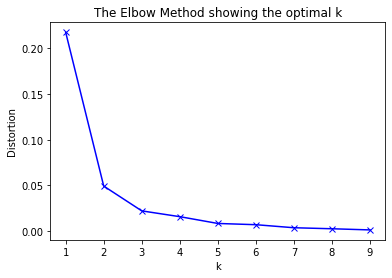

In [28]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_clusters)
    kmeanModel.fit(df_clusters)
    distortions.append(sum(np.min(cdist(df_clusters, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clusters.shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

And now we know that we will be using just 2 clusters for our model.

In [29]:
kclusters = 2

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)

kmeans.labels_[0:24]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [30]:
datafilter.insert(0, 'Cluster Labels', kmeans.labels_)
datafilter.head()

,Cluster Labels,RecordNumber,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Xaxis,...,Country,LocationText,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages,Notes,Number of restaurants,Number of Sports Bar restaurants
0,0,41350,89001,STANDARD,ALAMO,NV,PRIMARY,37.27,-115.20,-0.33,...,US,"Alamo, NV",NA-US-NV-ALAMO,False,397.0,769.0,14631642.0,0,0.0,0.0
1,0,41351,89001,STANDARD,RACHEL,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,...,US,"Rachel, NV",NA-US-NV-RACHEL,False,397.0,769.0,14631642.0,0,0.0,0.0
2,0,41352,89001,STANDARD,TEMPIUTE,NV,NOT ACCEPTABLE,37.27,-115.20,-0.33,...,US,"Tempiute, NV",NA-US-NV-TEMPIUTE,False,397.0,769.0,14631642.0,0,0.0,0.0
3,0,41357,89020,STANDARD,AMARGOSA VALLEY,NV,PRIMARY,36.53,-116.47,-0.35,...,US,"Amargosa Valley, NV",NA-US-NV-AMARGOSA VALLEY,False,459.0,898.0,13388073.0,0,0.0,0.0
4,0,41358,89020,STANDARD,AMARGOSA VLY,NV,ACCEPTABLE,36.53,-116.47,-0.35,...,US,"Amargosa Vly, NV",NA-US-NV-AMARGOSA VLY,False,459.0,898.0,13388073.0,0,0.0,0.0


## Results

In [31]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)
colours = ['red', 'black']
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster, income in zip(datafilter['Lat'], datafilter['Long'], datafilter['City'], datafilter['Cluster Labels'], df_clusters[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*5+15,
        popup=label,
        color=colours[cluster],
        fill=True,
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

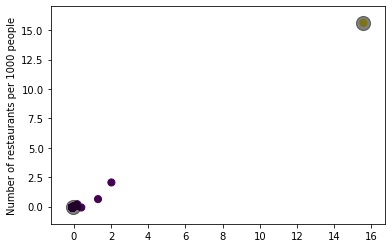

In [32]:
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters[:, 0], df_clusters[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.ylabel('Number of restaurants per 1000 people')
plt.show()

## Conclusions

As we introduce the clusters and the zipcodes of all the cities in Nevada, we can see that we can have an opportunity if we manage to open a restaurant near Reno, Goldhill, Highlands and those cities or neighbourhoods, and there is also a possibility of success in Las Vegas where the rest of the clusters are, if we zoom out on the map we can see that the majority of the clusters are in the multiple cities that I just named, but in Las Vegas there are a lot more of other clusters that might give us an idea of where is most of the population in Nevada.